# Aprendizaje No Supervizado - Reducción de Dimensiones

En la sección se cubre lo siguiente:

* Ejemplos
* Transformación y exploración de varias variables
* Algo de Teoría 
* ¿Cuantos Componentes tomar?
* Ejercicios

## Reducción de Dimensiones

En los ejemplos que se realizaron en [Clasificacion]() y [Regresion](), el conjunto de variables fue de --- respectivamente. Por lo cual podemos decir que las dimensiones fueron:

Como se mencionó en la intruducción los datos se pueden visualizar como una matriz  de la forma:

$$\mathbf{X} = \begin{bmatrix}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \dots  & x_{50}^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \dots  & x_{50}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{1}^{(1000)} & x_{2}^{(1000)} & x_{3}^{(1000)} & \dots  & x_{50}^{(1000)}
\end{bmatrix}.
$$ Donde tenemos 1000 muestras y 50 variables.

La ide general es lograr reducir la cantidad de variables invoucradas pero buscando quedarse con las variables que resulten ser las más "relevantes" para el modelo. Se podría pensar en que se desea lo siguiente:
$$\mathbf{X} = \begin{bmatrix}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \dots  & x_{50}^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \dots  & x_{50}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{1}^{(1000)} & x_{2}^{(1000)} & x_{3}^{(1000)} & \dots  & x_{50}^{(1000)}
\end{bmatrix} \longrightarrow \mathbf{U} = \begin{bmatrix}
    u_{1}^{(1)} & u_{2}^{(1)} & u_{3}^{(1)} & \dots  & u_{30}^{(1)} \\
    u_{1}^{(2)} & u_{2}^{(2)} & u_{3}^{(2)} & \dots  & u_{30}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    u_{1}^{(1000)} & u_{2}^{(1000)} & u_{3}^{(1000)} & \dots  & u_{30}^{(1000)}
\end{bmatrix}
$$


## Ejemplo

En los dos ejemplos previos se consideró la situación donde tenemos el siguiente problema:$$ Y=f(X)+\epsilon$$ para éste caso, el método que se usará se centra en transformar $X$. Podríamos ver el problema como la siguiente relación: $$ Y=f(T(X))+\epsilon=f(U)+\epsilon$$

### Ejemplo Clásico

Un conjunto de datos clásico para probar técnicas de clasificación, clustering o reducción de dimensiones es la muestra `load_iris` Esta muestra de datos se debe a [Sir Ronald Fisher](https://es.wikipedia.org/wiki/Ronald_Fisher).

Para tratar de visualizar lo que sucede con las técnicas de reducción de dimensiones, en particular con PCA; se generan varios gráficos para tratar de reflejar lo que se realiza.

In [1]:
#Entono para exploració y tratamiento de los datos
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuracion Matplotlib
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize']=15

#Se cargan los datos
from sklearn.datasets import load_iris
Iris=load_iris()

In [4]:
#Las variables que contiene la muestra de datos

print("El target tiene %s categorías"%np.unique(Iris.target))
print()
print(" Las variables que se tienen son:\n")
for i in Iris.feature_names:
    print(i)

El target tiene [0 1 2] categorías

 Las variables que se tienen son:

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


Se toman las medidas de los pétalos y ancho del sépalo.

### Vizualizaciones

Observamos que tenemos **4** variables y **3** categorías, entonces podemos visualizar como se relaciones las 3 categorías con las variables hacindo un  scatter plot.

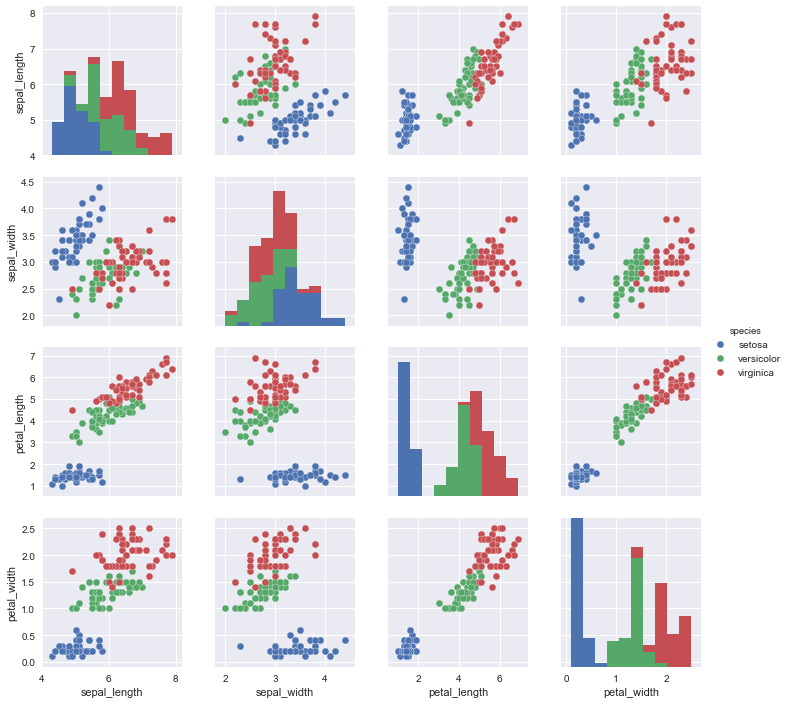

In [39]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

Se muestran las relaciones entre las 4 variables de *par en par* y con las 3 clases se mezclan de manera diferente. En la siguiente imagen se toman datos de 3 de las variables y se presenta como se "vería" la mezcla de clases.

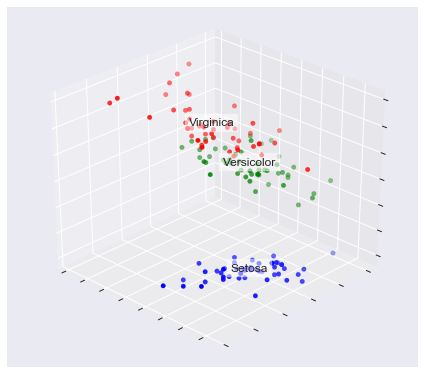

In [16]:
#Se corre un script para mostrar como se visualizarían en 3d los valores de las 3 primeras variables de la muestra.
%run Script/PCA_3d.py

En las dos gráficas anteriores se *reducen dimensiones* de los datos, ya que las gŕaficas reflejan el comportamiento de las categorías $Dim=4\longrightarrow Dim=2$ y $Dim=4\longrightarrow Dim=3$.

En las primeras gráficas y en la última en 3D, se logra ver que las la flor **setosa** se muestra separada de las otras dos, pero entre **verginica** y **versicolour** no se visualizan separadas en todos los casos.

Si aplicamos **Componentes Principales** en la muestra de datos y elegimos solo **2** compotenentes, se logra obtener la siguiente gráfica.

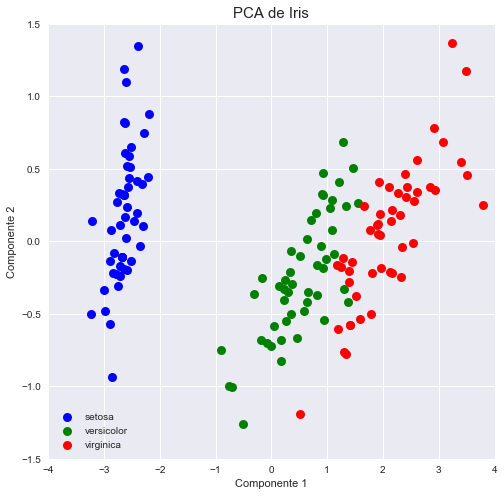

In [18]:
%run Script/PCA_2d.py

La anterior gráfica, se parece mucho a las 4 gráficas de la matriz de scatter plot, la diferencia entre  ellas está en quienes son las variables que se grafican. En la matriz de gráficas, son un par de variables de las 4 que se tienen, en la gráfica de PCA son un par de variables que se *contruyen* o extraen como combinación lineal de las 4 variables.

### Resumen del ejemplo visual

Se tomó una muestra de datos con 4 variables y 3 categorías, se redujo a una muestra de 2 varibles y 3 categorías por medio de **PCA**.

### Ejemplo datos de personas enfermas de Parkinson

Para el ejemplo se hace uso de los datos de personas enfermas con [Parkinson](https://es.wikipedia.org/wiki/Enfermedad_de_Parkinson), los datos pueden ser descargados directamente [aquí](https://archive.ics.uci.edu/ml/datasets/Parkinsons).
 
Para mayor información se puede leer el artículo:
* [Little MA, McSharry PE, Roberts SJ,Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection](https://ncbi.nlm.nih.gov/pmc/articles/PMC1913514/) 

In [19]:
#Entono para exploració y tratamiento de los datos
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuracion Matplotlib
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize']=15

Se cargan los datos desde el folder *DataSets*.

In [20]:
Datos=pd.read_csv("DataSets/parkinson.csv")

Exploramos y visualizamos los datos, se revisa el tamaño, el tipo de variables y sus estadísticas en general. Se revisa si todas las variables tienen datos completos o se cuenta con datos faltantes ( missing values).

In [21]:
#Tamaño del archivo
Datos.shape

(195, 24)

Se cuenta con 195 muestras de datos y 24 columnas.

In [22]:
#Se visualiza el tipo de variables
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

Se observa que la variables **name** es una cadena( o string) y la variable **status** es un número entero. La variable respuesta o dependiente para est conjunto de datos es la variable **status**.

In [23]:
#Exploración de Missin Values
Datos.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Se tienen información para todas las variables en todas las submuestras; es decir, no hay "Missin Values".

In [24]:
#Se visualizan los primeros registros
Datos.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Como se mencionó anteriormente, la variable **name** y **status** no son variables que deseamos revisar sus estadisticas.  Así que exploramos las estadísticas de los datos omitiendo la información de esas dos columnas.

In [25]:
#Variable con las columnas que deseamos omitir
Variables_omitidas=['name','status']

#Se eligen todas las columnas diferentes a las omitidas
Datos.iloc[:,~Datos.columns.isin(Variables_omitidas)].describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Se observa en la tabla de arriba que varias de las variables cumplen con "$media>mediana$", lo cual dice que tienen distribuciones no centradas. Para corroborar lo que se observa con los estadísticos se realiza un histograma para visualizar la distribución de varias de las variables.

Elegimos visualizar 4 variables.

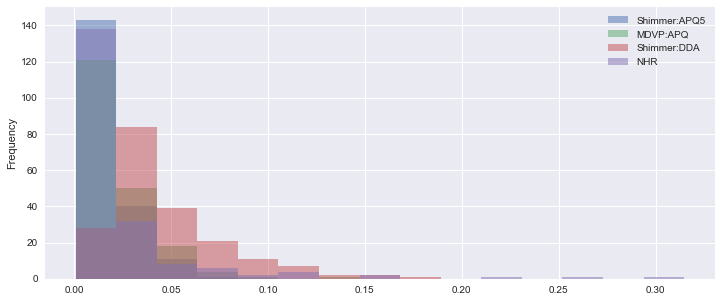

In [26]:
Datos.iloc[:,[12,13,14,15]].plot.hist(alpha=0.5, bins=15)

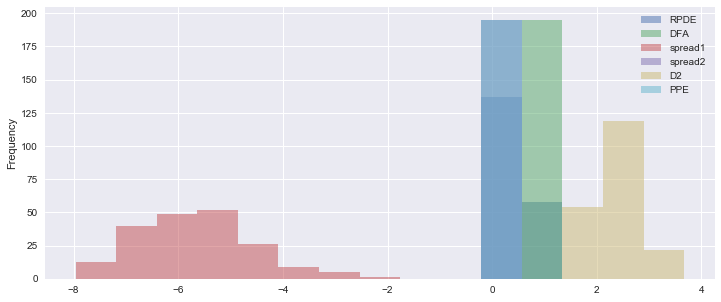

In [27]:
#Otras variables
Datos.iloc[:,[18,19,20,21,22,23]].plot.hist(alpha=0.5, bins=15)

En los dos histogramas se aprecia que las vribles no están centradas o que tienen forma de "campana" y además se aprecia que al contar con diferentes escalas, la relación entre ellas no es clara.

## Comentario

En los datos tenemos 22 variables que podemos usar para clasificar a las personas con respecto a la variable **status**. Los histogramas mostraron que las *distribuciones* de los datos no son del todo similares, muestran **escalas** muy diferentes.

Entonces como primer ejemplo, se aplica una regresión logístia considerando todas las variables y después elegimos un subconjunto de las 22 variables y se vuelve a calcular la regresión.

In [29]:
#Se divide la muestra entre el conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Se eligen todas las columnas diferentes a las omitidas
X_input=Datos.iloc[:,~Datos.columns.isin(Variables_omitidas)].copy()
Y_Target=Datos.status.copy()

#Definimos tomar 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X_input, Y_Target,
                                                    test_size=0.20,
                                                    random_state=123)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Modelo_LR=LogisticRegression()
Modelo_LR.fit(X_train,y_train)
Pred_LR=Modelo_LR.predict(X_test)

print("Regresión Logística")
print("La precisón es de %f"%(accuracy_score(y_test,Pred_LR)))

Regresión Logística
La precisón es de 0.871795


Se obtienen una precisión de **87.17%** aplicando directamente la regresión logística. Se eligen ahora un subconjunto de variables de entre las 22 que se tienen. Se descartan las 13 variables que tengan más **correlación** con el resto de variables.

In [59]:
Datos_Elegidos=Datos.iloc[:,~Datos.columns.isin(Variables_omitidas)].copy()

#matriz de correlación
A=Datos_Elegidos.corr()

#Elección de las 13 variables con mayor correlación
A.apply(lambda x: np.abs(x)).sum().sort_values(ascending=False)[:13]

MDVP:Shimmer(dB)    14.488358
MDVP:Shimmer        14.402433
MDVP:PPQ            14.252902
MDVP:Jitter(%)      14.129006
MDVP:APQ            14.066572
Shimmer:DDA         14.009523
Shimmer:APQ3        14.009458
Shimmer:APQ5        13.983025
MDVP:Jitter(Abs)    13.772191
MDVP:RAP            13.749464
Jitter:DDP          13.749088
PPE                 13.616599
HNR                 13.506424
dtype: float64

In [57]:
Variables_omitidas2=['name','status','MDVP:Shimmer(dB)','MDVP:Shimmer','MDVP:PPQ','MDVP:Jitter(%)','MDVP:APQ','Shimmer:DDA','Shimmer:APQ3','Shimmer:APQ5','MDVP:Jitter(Abs)','MDVP:RAP','Jitter:DDP','PPE','HNR']

#Se eligen todas las columnas diferentes a las omitidas
X_input2=Datos.iloc[:,~Datos.columns.isin(Variables_omitidas2)].copy()

#Definimos tomar 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X_input2, Y_Target,
                                                    test_size=0.20,
                                                    random_state=123)

Modelo_LR=LogisticRegression()
Modelo_LR.fit(X_train,y_train)
Pred_LR=Modelo_LR.predict(X_test)

print("Regresión Logística")
print("La precisón es de %f"%(accuracy_score(y_test,Pred_LR)))

Regresión Logística
La precisón es de 0.871795


En la anterior estimación se observa que se tienen la misma precisión que se había obtenido con las 22 variable, esto no dice que las 13 variables que se eliminaron no sean importantes. Pero no aportan mucho al modelo.

En cierto sentido se hizo una reducción de dimensiones, se pasó de tener 22 variables a solo 9 y la precisión del modelo fue la misma. La reduccion o elección de las variables fue hasta cierto punto arbitraria, pero muestra que quizás hay información redundante entre las variables y quizás solo algunas son realmente importants.

## Transformación de Variables

Los histogramas anteriores mostraban que las variables tenían diferentes escalas tanto por las unidades de medición de cada variable como el significado. Dependiente de los datos es importante en muchos casos transformar las variables.

Hay varias transformaciones usuales, para este ejemplo se considera la *normalización* de los datos. Es decir, se resta la media y se divide por la desviación estandar a cada variables: $$\mathcal{X}=\frac{X-media}{desviacionEstandar}$$

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
#Se visualiza la media de los datos originales
X_input.mean()

MDVP:Fo(Hz)         154.228641
MDVP:Fhi(Hz)        197.104918
MDVP:Flo(Hz)        116.324631
MDVP:Jitter(%)        0.006220
MDVP:Jitter(Abs)      0.000044
MDVP:RAP              0.003306
MDVP:PPQ              0.003446
Jitter:DDP            0.009920
MDVP:Shimmer          0.029709
MDVP:Shimmer(dB)      0.282251
Shimmer:APQ3          0.015664
Shimmer:APQ5          0.017878
MDVP:APQ              0.024081
Shimmer:DDA           0.046993
NHR                   0.024847
HNR                  21.885974
RPDE                  0.498536
DFA                   0.718099
spread1              -5.684397
spread2               0.226510
D2                    2.381826
PPE                   0.206552
dtype: float64

In [65]:
scaler.fit(X_input)

StandardScaler(copy=True, with_mean=True, with_std=True)

Se estiman los valores necesarios para la transformación.

In [66]:
X_input_scaled = scaler.transform(X_input)

Se transforman las variables.

In [70]:
#Se revisa las medias de las variables transformadas
pd.DataFrame(X_input_scaled,columns=X_input.columns).mean()

MDVP:Fo(Hz)         3.529940e-17
MDVP:Fhi(Hz)       -2.237526e-16
MDVP:Flo(Hz)        1.309494e-16
MDVP:Jitter(%)     -2.127927e-17
MDVP:Jitter(Abs)    2.562053e-18
MDVP:RAP           -1.380662e-16
MDVP:PPQ            9.351494e-17
Jitter:DDP          1.015569e-16
MDVP:Shimmer        2.818258e-16
MDVP:Shimmer(dB)   -1.374969e-16
Shimmer:APQ3        8.255505e-17
Shimmer:APQ5        1.930080e-16
MDVP:APQ           -8.824850e-17
Shimmer:DDA        -1.577086e-16
NHR                 5.152574e-17
HNR                 8.770762e-16
RPDE               -1.913000e-16
DFA                 5.687758e-16
spread1             1.184451e-15
spread2            -1.429056e-16
D2                 -6.117614e-16
PPE                -2.960595e-17
dtype: float64

Se hace una visualización de la densidad de todas las variables.

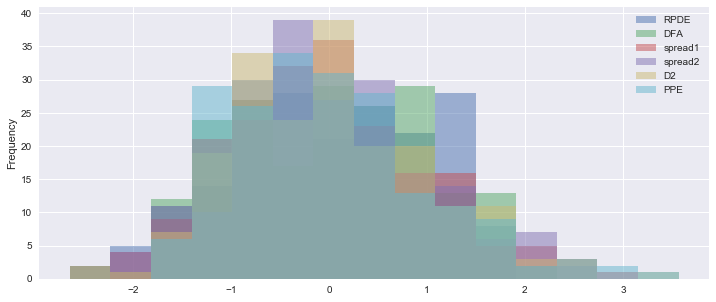

In [82]:
#Datos tranformados
pd.DataFrame(X_input_scaled,columns=X_input.columns).iloc[:,[16,17,18,19,20,21]].plot.hist(alpha=0.5, bins=15)

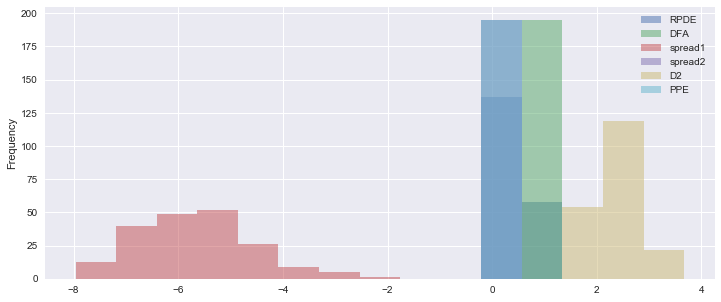

In [84]:
#Datos Originales
pd.DataFrame(X_input,columns=X_input.columns).iloc[:,[16,17,18,19,20,21]].plot.hist(alpha=0.5, bins=15)

Se muestra que al transformar las variables se precia cierta forma similar entre las variables, a diferencia entre las variables originales.

## Análisis de Componentes Principales

Los ejemplos anteriores, tanto de los datos de Iris como los datos de las personas enfermas de Parkinson; se trató de mostrar la idea de reducir dimensiones. El siguiente método forma parte de los algoritmos de aprendizaje no supervizado y entre sus aplicaciones es reducir dimensiones.

In [74]:
#Cálculo de los PCA
from sklearn.decomposition import PCA

#Se define la función
pca=PCA(n_components=8)

#Se estiman a los datos normalizados
pca.fit(X_input_scaled)

#Transformación
X_pca = pca.transform(X_input_scaled)


Se extraen 8 componentes principales, lo cual implica que reducimos las 22 variables a solo 8 que representan la información de las 22 variables.

In [75]:
#Tamaño de la muestra
X_pca.shape

(195, 8)

In [76]:
#Definimos tomar 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y_Target,
                                                    test_size=0.20,random_state=123)

#Se Estima la regresión logística
Modelo_LR=LogisticRegression()
Modelo_LR.fit(X_train,y_train)
Pred_LR=Modelo_LR.predict(X_test)

print("Regresión Logística")
print("La precisón es de %f"%(accuracy_score(y_test,Pred_LR)))

Regresión Logística
La precisón es de 0.897436


Se aprecia que se obtiene mejor precisión al estimar la regresión logística sobre solo 8 variables, comparado con la estimación realizada sobre las 22 variables. 

Así que se aprecia que en este caso se tienen una mejora al reducir las dimensiones por medio de la extracción de los 8 componentes princiapales. En general los dos primeros componentes principales concentran "la mayor información". 

Se hace un gráfico para visualizar como se comportan las personas enfermas con Parkinson con respecto a los dos primeros componentes.

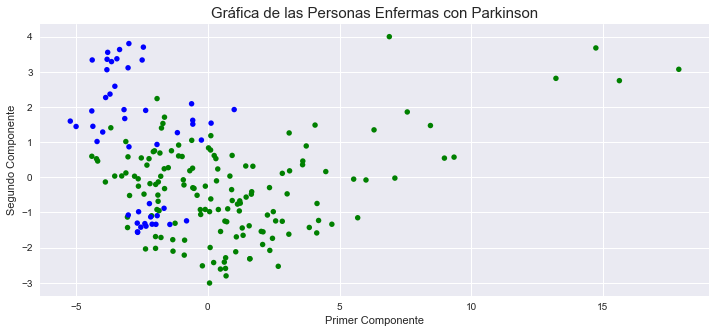

In [85]:
#Gráfica de los dos primeros componentes principales

y = np.choose(Y_Target, ['b', 'g']).astype(np.object)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("Primer Componente")
plt.ylabel("Segundo Componente")
plt.title("Gráfica de las Personas Enfermas con Parkinson")

## Algo de Teoría

Considerando que los datos originales son $X$, se busca con los componentes principales lograr obtener $$U=XT$$ donde la *información más relevante* se obtiene en $U$ y $T$ es una matriz donde cada columna es uno de los componentes principales. 

Las columnas de $T$ son los vectores propios de la matriz de covarianza de las variables presentes en $X$. Si se considera que $X=[X_1,...,X_p]$, la covarianza se calcularía la covarrianza de un par de columnas como: $$Cov(X_i,X_j)=\mathbb{E}[(X_i-\mathbb{E}(X_i))(X_j-\mathbb{E}(X_j))]$$

 En resumen los Componentes Principales construyen una transformación lineal para pasar los datos aun nuevo sistema de coordenadas para el cual la muestra de datos originales $X$ tenga  la varianza de mayor tamaño en el  primer vector de la base (primer componente principal), la segunda varianza más grande en el segundo elemento de la base, y así sucesivamente. 

## ¿Cuantos componentes tomar?

Pensando que si la muestra de datos $X$ tienen dimension (1500,30). Donde son 1500 registros y 30 variables, tenemos la posibilidad de tener a lo más 30 componentes principales. Debido a que buscamos elegir la menor cantidad de componentes que expliquen la mayor cantidad de varianza de los datos. Entonces la pregunta es como establecer un criterio para considerar cuantos componentes son suficientes.

En el anterior calculo de los 8 componentes princiales se puede visualizar la exlicación de la varianza por esos 8 componentes.

La suma de varianza explicad es 95.7667009364 por ciento.


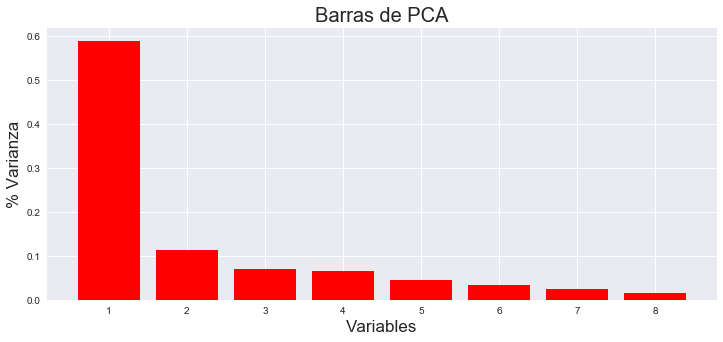

In [102]:
#Se grafican los valores de la varianza esplicada
plt.bar(left=list(range(1,len(pca.explained_variance_ratio_)+1)),height=pca.explained_variance_ratio_,color="r")
plt.ylabel('% Varianza',fontdict={'fontsize':17})
plt.xlabel('Variables',fontdict={'fontsize':17})
plt.title('Barras de PCA',fontdict={'fontsize':20})
print("La suma de varianza explicad es %s por ciento."% (pca.explained_variance_ratio_.sum()*100))

Se puede realizar el cálculo de los priemeros 4 componentes principales y visualizar de manera similar.

La suma de varianza explicad es 83.868188509 por ciento.


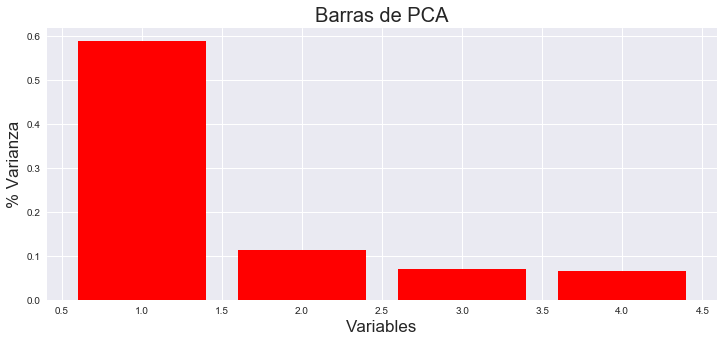

In [103]:
#Se calculan los 4 primeros componentes principales
pca=PCA(n_components=4)

#Se estiman a los datos normalizados
pca.fit(X_input_scaled)

#Se grafican los valores de la varianza esplicada
plt.bar(left=list(range(1,len(pca.explained_variance_ratio_)+1)),height=pca.explained_variance_ratio_,color="r")
plt.ylabel('% Varianza',fontdict={'fontsize':17})
plt.xlabel('Variables',fontdict={'fontsize':17})
plt.title('Barras de PCA',fontdict={'fontsize':20})
print("La suma de varianza explicad es %s por ciento."% (pca.explained_variance_ratio_.sum()*100))

Se observa que los primeros 8 explican un 95% de la varianza y los primeros 4 solo explican el 83%. Existen varios criterios para eligir la cantidad de componentes principales, en este ejemplo se eligió el *critério del porcentaje* por medio del cual consideramos la cantidad de componentes que explican el 95% de la varianza.

## Ejercicios

Para los ejercicios se uso de los mismo datos de parkinson.csv.

In [ ]:
# 1.- Escalar las variables pero por la función MinMaxScaler() 


In [ ]:
# 2.- Estimar la regresión logística de los datos escalados en el ejercicio 1

In [ ]:
# 3.- Estimar la clasificación pero con la función DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 4.- Extraer los 4 y 8 primeros componentes principales y graficar su varianza explicada

In [ ]:
#5.- Calcular la regresión logística y el árbol de decisiones de la muestra obtenida con los 4 y 8 componentes principales.